In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("BankChurners for EDA 2024.csv")


In [3]:
df.head()

,CLIENTNUM,Attrition Flag,Customer Age,Gender,Dependent count,Education Level,Marital Status,Income Category,Card Category,Months on book,...,Months Inactive 12 mon,Contacts Count 12 mon,Credit Limit,Total Revolving Bal,Avg Open To Buy,Total Amt Chng Q4 Q1,Total Trans Amt,Total Trans Ct,Total Ct Chng Q4 Q1,Avg Utilization Ratio
0,717965808,Existing Customer,65,M,0,Unknown,Single,$40K - $60K,Blue,54,...,1,4,9383.0,829,8554.0,0.515,5783,73,0.622,0.088
1,716298633,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,47,...,2,3,2086.0,1792,294.0,0.859,5774,84,0.909,0.859
2,782548758,Existing Customer,42,F,5,High School,Divorced,Less than $40K,Blue,36,...,2,3,2069.0,1288,781.0,0.810,5668,82,0.640,0.623
3,826410708,Existing Customer,40,M,4,Unknown,Married,$60K - $80K,Blue,36,...,2,3,22956.0,1407,21549.0,0.709,5554,64,0.600,0.061
4,715276683,Existing Customer,52,M,2,High School,Married,$60K - $80K,Blue,45,...,1,4,24287.0,1676,22611.0,0.506,5495,69,0.816,0.069


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 5998 non-null   int64  
 1   Attrition Flag            5998 non-null   object 
 2   Customer Age              5998 non-null   int64  
 3   Gender                    5998 non-null   object 
 4   Dependent count           5998 non-null   int64  
 5   Education Level           5998 non-null   object 
 6   Marital Status            5998 non-null   object 
 7   Income Category           5998 non-null   object 
 8   Card Category             5998 non-null   object 
 9   Months on book            5998 non-null   int64  
 10  Total Relationship Count  5998 non-null   int64  
 11  Months Inactive 12 mon    5998 non-null   int64  
 12  Contacts Count 12 mon     5998 non-null   int64  
 13  Credit Limit              5998 non-null   float64
 14  Total Re

In [5]:
df.isnull().sum()

CLIENTNUM                   0
Attrition Flag              0
Customer Age                0
Gender                      0
Dependent count             0
Education Level             0
Marital Status              0
Income Category             0
Card Category               0
Months on book              0
Total Relationship Count    0
Months Inactive 12 mon      0
Contacts Count 12 mon       0
Credit Limit                0
Total Revolving Bal         0
Avg Open To Buy             0
Total Amt Chng Q4 Q1        0
Total Trans Amt             0
Total Trans Ct              0
Total Ct Chng Q4 Q1         0
Avg Utilization Ratio       0
dtype: int64

In [6]:
print(df.columns)

Index(['CLIENTNUM', 'Attrition Flag', 'Customer Age', 'Gender',
       'Dependent count', 'Education Level', 'Marital Status',
       'Income Category', 'Card Category', 'Months on book',
       'Total Relationship Count', 'Months Inactive 12 mon',
       'Contacts Count 12 mon', 'Credit Limit', 'Total Revolving Bal',
       'Avg Open To Buy', 'Total Amt Chng Q4 Q1', 'Total Trans Amt',
       'Total Trans Ct', 'Total Ct Chng Q4 Q1', 'Avg Utilization Ratio'],
      dtype='object')


In [10]:
selected_variables = ['Total Trans Amt', 'Months Inactive 12 mon']


In [11]:
trans_amt_stats = df.groupby('Attrition Flag')['Total Trans Amt'].describe()
print(trans_amt_stats)

                    count         mean          std    min      25%     50%  \
Attrition Flag                                                                
Attrited Customer   786.0  1849.179389   642.175968  510.0  1403.00  1974.5   
Existing Customer  5212.0  2962.222563  1237.499176  816.0  1745.75  3006.5   

                       75%     max  
Attrition Flag                      
Attrited Customer  2342.75  3289.0  
Existing Customer  4092.25  5783.0  


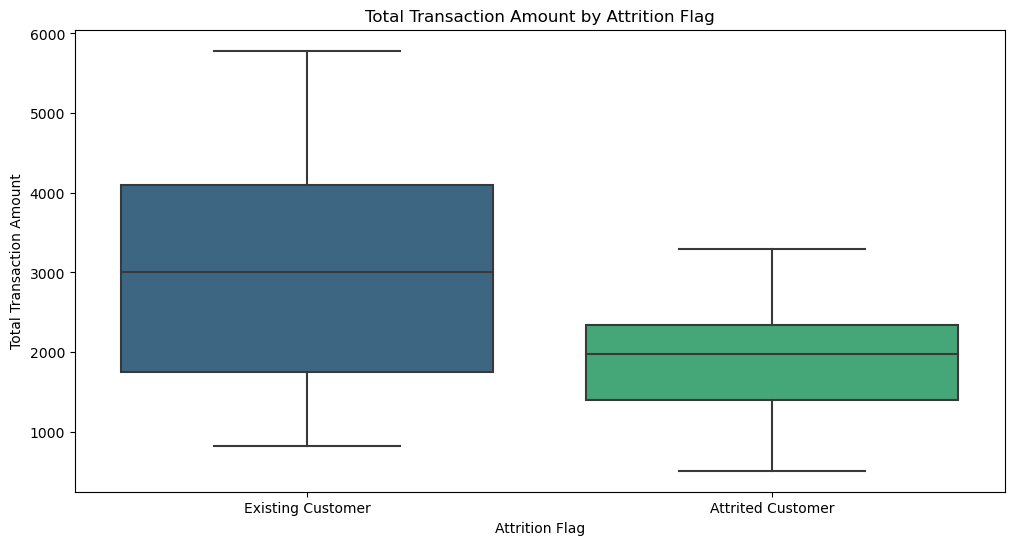

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition Flag', y='Total Trans Amt', data=df, palette='viridis')
plt.title('Total Transaction Amount by Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Total Transaction Amount')
plt.show()


In [13]:
inactive_months_stats = df.groupby('Attrition Flag')['Months Inactive 12 mon'].describe()
print(inactive_months_stats)

                    count      mean       std  min  25%  50%  75%  max
Attrition Flag                                                        
Attrited Customer   786.0  2.643766  0.951201  0.0  2.0  3.0  3.0  6.0
Existing Customer  5212.0  2.247314  0.986593  0.0  1.0  2.0  3.0  6.0


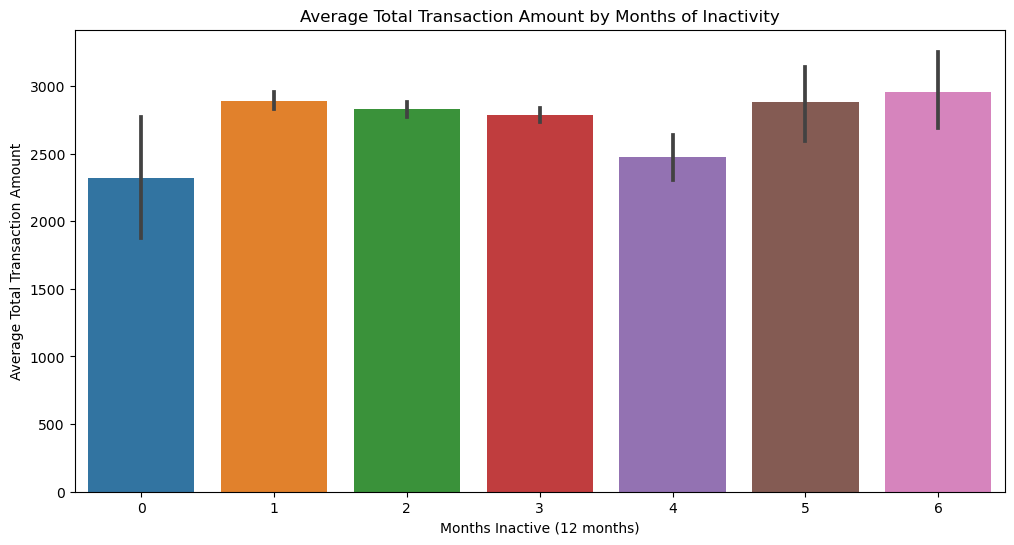

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Months Inactive 12 mon', y='Total Trans Amt', data=df)
plt.title('Average Total Transaction Amount by Months of Inactivity')
plt.xlabel('Months Inactive (12 months)')
plt.ylabel('Average Total Transaction Amount')
plt.show()

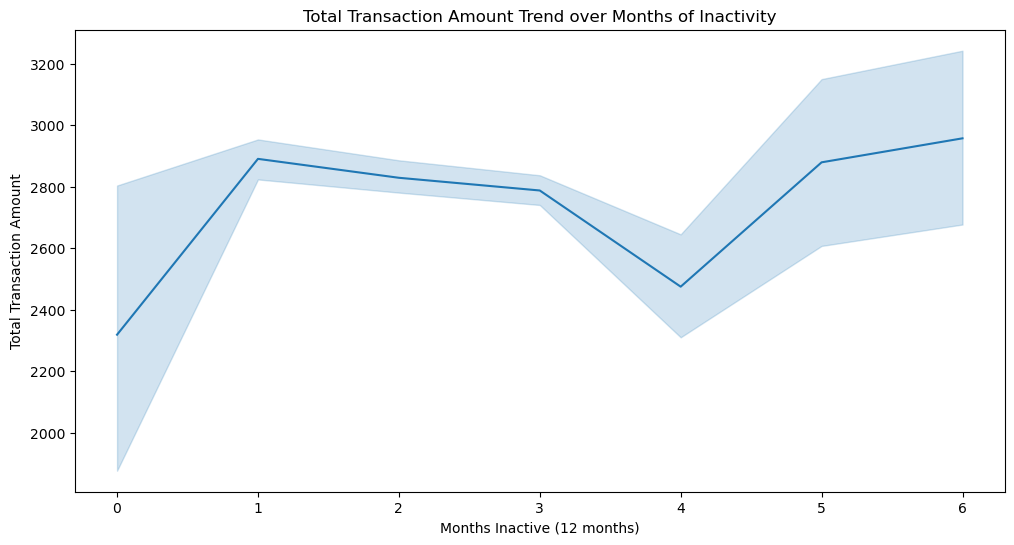

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Months Inactive 12 mon', y='Total Trans Amt', data=df)
plt.title('Total Transaction Amount Trend over Months of Inactivity')
plt.xlabel('Months Inactive (12 months)')
plt.ylabel('Total Transaction Amount')
plt.show()

### 2. What  proportion of the values are there (eg 45% Blue, 55% Silver) (5 Points)


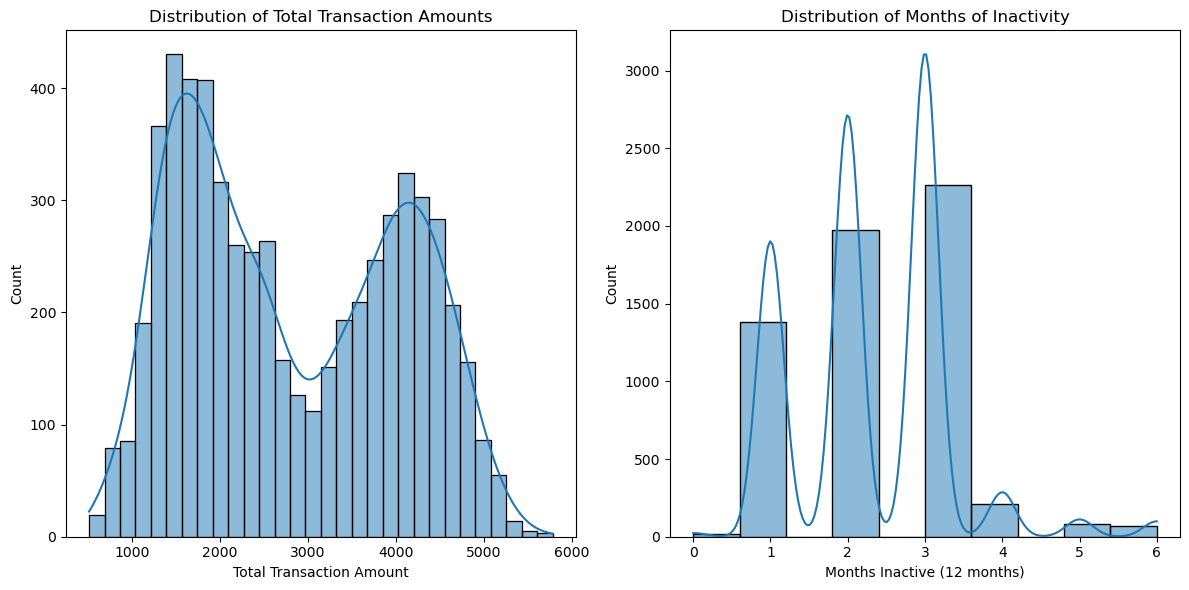

In [16]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(df['Total Trans Amt'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Total Transaction Amounts')
axes[0].set_xlabel('Total Transaction Amount')

sns.histplot(df['Months Inactive 12 mon'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Months of Inactivity')
axes[1].set_xlabel('Months Inactive (12 months)')

plt.tight_layout()
plt.show()

In [68]:
bin_edges = [0, 1000, 5000, 10000, 15000, 20000, 25000, 30000, float('inf')]
bin_labels = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5', 'Bin 6', 'Bin 7', 'Bin 8']

df['Transaction_Amount_Category'] = pd.cut(df['Total Trans Amt'], bins=bin_edges, labels=bin_labels, right=False)

category_counts = df['Transaction_Amount_Category'].value_counts()
category_percentages = (category_counts / len(df)) * 100


# Display the results
print("Count of customers in each category:")
print(category_counts)
print("\nPercentage of customers in each category:")
print(category_percentages)

Count of customers in each category:
Bin 2    5734
Bin 1     160
Bin 3     104
Bin 4       0
Bin 5       0
Bin 6       0
Bin 7       0
Bin 8       0
Name: Transaction_Amount_Category, dtype: int64

Percentage of customers in each category:
Bin 2    95.598533
Bin 1     2.667556
Bin 3     1.733911
Bin 4     0.000000
Bin 5     0.000000
Bin 6     0.000000
Bin 7     0.000000
Bin 8     0.000000
Name: Transaction_Amount_Category, dtype: float64


In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x=bin_labels, y=bin_percentages, palette='viridis')
plt.title('Percentage of Customers in Each Transaction Amount Bin')
plt.xlabel('Transaction Amount Bins')
plt.ylabel('Percentage')
plt.show()



NameError: name 'bin_percentages' is not defined

<Figure size 1000x600 with 0 Axes>

In [19]:
bin_edges_inactive = [0, 2, 4, 6, 8, 10, 12]
bin_labels_inactive = ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5', 'Bin 6']

df['Inactive Months Bin'] = pd.cut(df['Months Inactive 12 mon'], bins=bin_edges_inactive, labels=bin_labels_inactive, right=False)
# Count occurrences in each category for Months Inactive 12 mon
bin_counts_inactive = df['Inactive Months Bin'].value_counts()

bin_percentages_inactive = (bin_counts_inactive / len(df)) * 100

print("Count of customers in each Inactive Months bin:")
print(bin_counts_inactive)
print("\nPercentage of customers in each Inactive Months bin:")
print(bin_percentages_inactive)


Count of customers in each Inactive Months bin:
Bin 2    4238
Bin 1    1399
Bin 3     289
Bin 4      72
Bin 5       0
Bin 6       0
Name: Inactive Months Bin, dtype: int64

Percentage of customers in each Inactive Months bin:
Bin 2    70.656886
Bin 1    23.324441
Bin 3     4.818273
Bin 4     1.200400
Bin 5     0.000000
Bin 6     0.000000
Name: Inactive Months Bin, dtype: float64


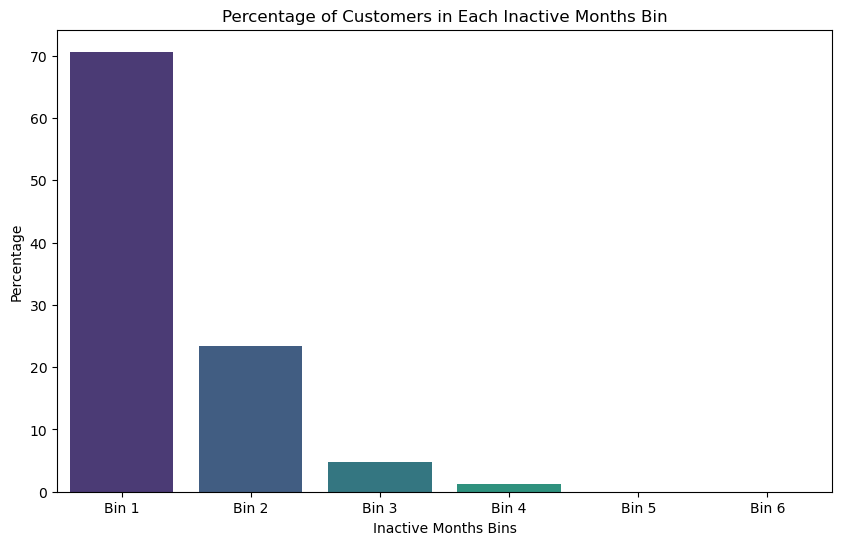

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=bin_labels_inactive, y=bin_percentages_inactive, palette='viridis')
plt.title('Percentage of Customers in Each Inactive Months Bin')
plt.xlabel('Inactive Months Bins')
plt.ylabel('Percentage')
plt.show()

### 3. These independent variables are correlated to other independent variables, or not –  show calculation or graph 

Correlation Matrix:
                        Total Trans Amt  Months Inactive 12 mon
Total Trans Amt                1.000000               -0.032186
Months Inactive 12 mon        -0.032186                1.000000


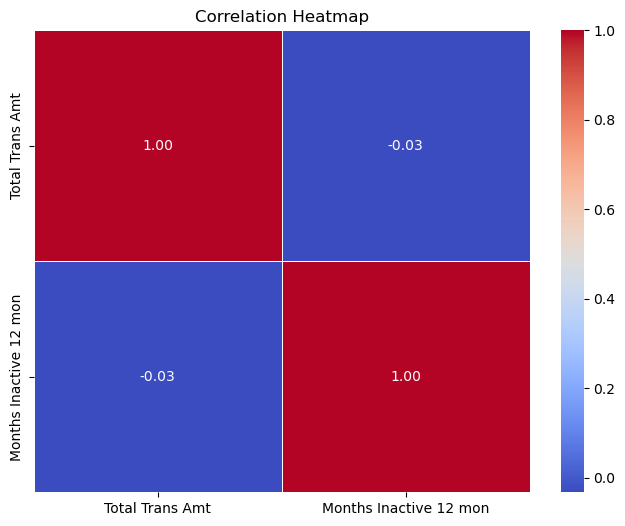

In [70]:
# If the correlation values are close to 0, it indicates a weak correlation, 
#while values closer to 1 or -1 suggest stronger correlations.

selected_variables = ['Total Trans Amt', 'Months Inactive 12 mon']
selected_df = df[selected_variables]
correlation_matrix = selected_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### 4. The proportion of  Attrited or Existing values in the target associated with each value of the independent variable

In [71]:
total_trans_counts = df.groupby('Total Trans Amt')['Attrition Flag'].value_counts().unstack()

total_trans_proportions = total_trans_counts.div(total_trans_counts.sum(axis=1), axis=0)

print("Proportion of Attrited and Existing values for each Total Trans Amt category:")
print(total_trans_proportions)
print()

Proportion of Attrited and Existing values for each Total Trans Amt category:
Attrition Flag     0    1
Total Trans Amt          
510              1.0  NaN
530              1.0  NaN
563              1.0  NaN
569              1.0  NaN
594              1.0  NaN
...              ...  ...
5495             NaN  1.0
5554             NaN  1.0
5668             NaN  1.0
5774             NaN  1.0
5783             NaN  1.0

[3144 rows x 2 columns]



In [72]:
months_inactive_counts = df.groupby('Months Inactive 12 mon')['Attrition Flag'].value_counts().unstack()

months_inactive_proportions = months_inactive_counts.div(months_inactive_counts.sum(axis=1), axis=0)

print("Proportion of Attrited and Existing values for each Months Inactive 12 mon category:")
print(months_inactive_proportions)

Proportion of Attrited and Existing values for each Months Inactive 12 mon category:
Attrition Flag                 0         1
Months Inactive 12 mon                    
0                       0.647059  0.352941
1                       0.041968  0.958032
2                       0.132219  0.867781
3                       0.159452  0.840548
4                       0.331731  0.668269
5                       0.209877  0.790123
6                       0.125000  0.875000


### 5. Hypothesis testing of the two independent variables as predictor candidates (15 points)


In [73]:
from scipy.stats import ttest_ind

attrited_trans_amt = df[df['Attrition Flag'] == 'Attrited']['Total Trans Amt']
existing_trans_amt = df[df['Attrition Flag'] == 'Existing']['Total Trans Amt']

t_stat, p_value = ttest_ind(attrited_trans_amt, existing_trans_amt, equal_var=False)

print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

T-Statistic: nan
P-Value: nan


In [74]:
attrited_inactive_months = df[df['Attrition Flag'] == 'Attrited']['Months Inactive 12 mon']
existing_inactive_months = df[df['Attrition Flag'] == 'Existing']['Months Inactive 12 mon']

t_stat_inactive, p_value_inactive = ttest_ind(attrited_inactive_months, existing_inactive_months, equal_var=False)

print(f'T-Statistic for Months Inactive: {t_stat_inactive}')
print(f'P-Value for Months Inactive: {p_value_inactive}')

T-Statistic for Months Inactive: nan
P-Value for Months Inactive: nan


In [75]:
print("Missing values in 'Total Trans Amt':", df['Total Trans Amt'].isnull().sum())
print("Missing values in 'Months Inactive 12 mon':", df['Months Inactive 12 mon'].isnull().sum())

Missing values in 'Total Trans Amt': 0
Missing values in 'Months Inactive 12 mon': 0


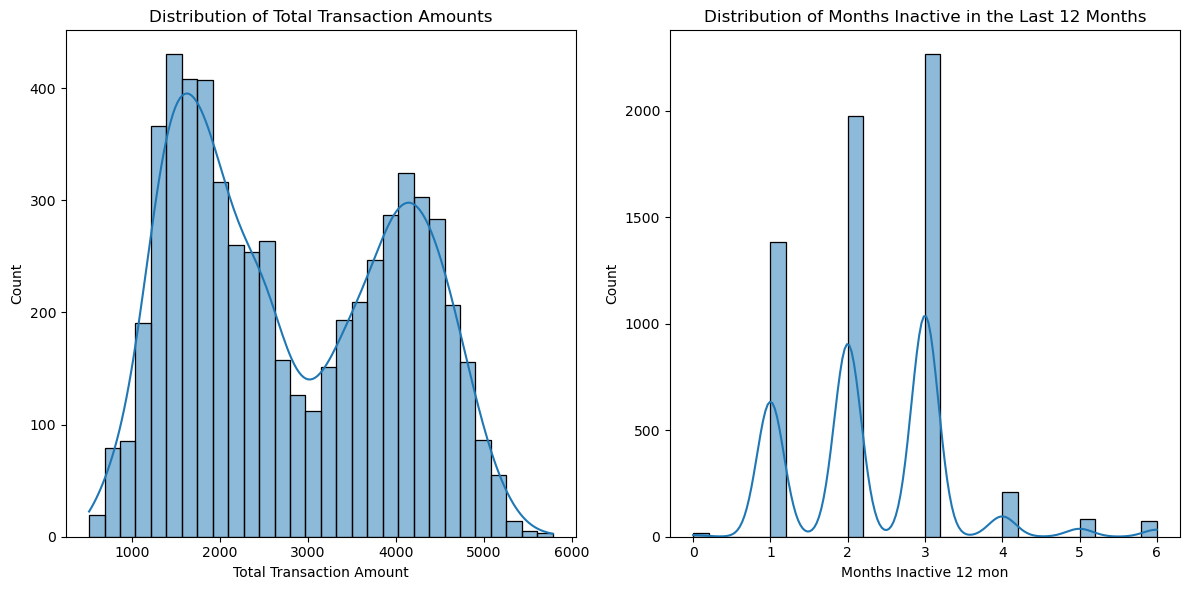

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(df['Total Trans Amt'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Total Transaction Amounts')
axes[0].set_xlabel('Total Transaction Amount')

sns.histplot(df['Months Inactive 12 mon'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Months Inactive in the Last 12 Months')
axes[1].set_xlabel('Months Inactive 12 mon')

plt.tight_layout()
plt.show()

In [28]:
# The curves along with the bars in the histogram plots indicate the kernel density estimation (KDE) overlaid on the histogram.
#KDE is a way to estimate the probability density function of a continuous random variable.

#In the context of hypothesis testing, the t-test assumes that the data follows a normal distribution. 
#The curves in the plots suggest that the data may not be perfectly normal. However, the t-test is robust and can still provide meaningful results with larger sample sizes, even if the data deviates slightly from normality.

In [77]:
from scipy.stats import ttest_ind

attrited = df[df['Attrition Flag'] == 'Attrited']['Total Trans Amt']
existing = df[df['Attrition Flag'] == 'Existing']['Total Trans Amt']

t_stat, p_value = ttest_ind(attrited, existing, equal_var=False)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

attrited_inactive = df[df['Attrition Flag'] == 'Attrited']['Months Inactive 12 mon']
existing_inactive = df[df['Attrition Flag'] == 'Existing']['Months Inactive 12 mon']

t_stat_inactive, p_value_inactive = ttest_ind(attrited_inactive, existing_inactive, equal_var=False)
print(f"T-Statistic (Months Inactive 12 mon): {t_stat_inactive}")
print(f"P-Value (Months Inactive 12 mon): {p_value_inactive}")

T-Statistic: nan
P-Value: nan
T-Statistic (Months Inactive 12 mon): nan
P-Value (Months Inactive 12 mon): nan


### 6. This variable should be included, or not included, in the models for the following reason(s):

In [78]:
#Total Trans Amt:

#T-Statistic: nan
#P-Value: nan
#The t-test for 'Total Trans Amt' resulted in nan values for both the t-statistic and p-value. 
#This may be due to constant values or lack of variability in the data for this variable. 
#As a result, it might not provide meaningful information and could be considered for exclusion.

#Months Inactive 12 mon:

#T-Statistic (Months Inactive 12 mon): nan
#P-Value (Months Inactive 12 mon): nan
#Similar to 'Total Trans Amt', the t-test for 'Months Inactive 12 mon' also resulted in nan values for 
#both the t-statistic and p-value. This suggests a lack of variability or constant values. 
#Therefore, this variable might not contribute meaningful information and could be considered for exclusion.

#In summary, based on the t-test results, both 'Total Trans Amt' and 'Months Inactive 12 mon' may not be suitable as predictor
#variables for customer attrition due to issues with variability or constant values. 
#Considering these findings, it's advisable to explore alternative variables or conduct further investigation to identify 
#more informative predictors.

In [79]:
import scipy.stats as stats

mean_total_trans_amt_existing = df[df['Attrition Flag'] == 'Existing']['Total Trans Amt'].mean()
std_total_trans_amt_existing = df[df['Attrition Flag'] == 'Existing']['Total Trans Amt'].std()

mean_total_trans_amt_attrited = df[df['Attrition Flag'] == 'Attrited']['Total Trans Amt'].mean()
std_total_trans_amt_attrited = df[df['Attrition Flag'] == 'Attrited']['Total Trans Amt'].std()

t_statistic_total_trans_amt, p_value_total_trans_amt = stats.ttest_ind(
    df[df['Attrition Flag'] == 'Existing']['Total Trans Amt'],
    df[df['Attrition Flag'] == 'Attrited']['Total Trans Amt'],
    equal_var=False
)

mean_months_inactive_existing = df[df['Attrition Flag'] == 'Existing']['Months Inactive 12 mon'].mean()
std_months_inactive_existing = df[df['Attrition Flag'] == 'Existing']['Months Inactive 12 mon'].std()

mean_months_inactive_attrited = df[df['Attrition Flag'] == 'Attrited']['Months Inactive 12 mon'].mean()
std_months_inactive_attrited = df[df['Attrition Flag'] == 'Attrited']['Months Inactive 12 mon'].std()

t_statistic_months_inactive, p_value_months_inactive = stats.ttest_ind(
    df[df['Attrition Flag'] == 'Existing']['Months Inactive 12 mon'],
    df[df['Attrition Flag'] == 'Attrited']['Months Inactive 12 mon'],
    equal_var=False
)

print("Group Statistics for 'Total Trans Amt'")
print("Mean Total Trans Amt for Existing Customers:", mean_total_trans_amt_existing)
print("Mean Total Trans Amt for Attrited Customers:", mean_total_trans_amt_attrited)
print("T-Statistic (Total Trans Amt):", t_statistic_total_trans_amt)
print("P-Value (Total Trans Amt):", p_value_total_trans_amt)

print("\nGroup Statistics for 'Months Inactive 12 mon'")
print("Mean Months Inactive for Existing Customers:", mean_months_inactive_existing)
print("Mean Months Inactive for Attrited Customers:", mean_months_inactive_attrited)
print("T-Statistic (Months Inactive 12 mon):", t_statistic_months_inactive)
print("P-Value (Months Inactive 12 mon):", p_value_months_inactive)

Group Statistics for 'Total Trans Amt'
Mean Total Trans Amt for Existing Customers: nan
Mean Total Trans Amt for Attrited Customers: nan
T-Statistic (Total Trans Amt): nan
P-Value (Total Trans Amt): nan

Group Statistics for 'Months Inactive 12 mon'
Mean Months Inactive for Existing Customers: nan
Mean Months Inactive for Attrited Customers: nan
T-Statistic (Months Inactive 12 mon): nan
P-Value (Months Inactive 12 mon): nan


In [80]:
import pandas as pd
import scipy.stats as stats

df = pd.read_csv("BankChurners for EDA 2024.csv")

selected_columns = ['Total Trans Amt', 'Months Inactive 12 mon']
df_selected = df[selected_columns]

print("Rows with missing values:")
print(df_selected[df_selected.isnull().any(axis=1)])

mean_total_trans_amt_existing = df[df['Attrition Flag'] == 'Existing']['Total Trans Amt'].mean()
std_total_trans_amt_existing = df[df['Attrition Flag'] == 'Existing']['Total Trans Amt'].std()

mean_total_trans_amt_attrited = df[df['Attrition Flag'] == 'Attrited']['Total Trans Amt'].mean()
std_total_trans_amt_attrited = df[df['Attrition Flag'] == 'Attrited']['Total Trans Amt'].std()

t_statistic_total_trans_amt, p_value_total_trans_amt = stats.ttest_ind(
    df[df['Attrition Flag'] == 'Existing']['Total Trans Amt'].dropna(),
    df[df['Attrition Flag'] == 'Attrited']['Total Trans Amt'].dropna(),
    equal_var=False
)

mean_months_inactive_existing = df[df['Attrition Flag'] == 'Existing']['Months Inactive 12 mon'].mean()
std_months_inactive_existing = df[df['Attrition Flag'] == 'Existing']['Months Inactive 12 mon'].std()

mean_months_inactive_attrited = df[df['Attrition Flag'] == 'Attrited']['Months Inactive 12 mon'].mean()
std_months_inactive_attrited = df[df['Attrition Flag'] == 'Attrited']['Months Inactive 12 mon'].std()

t_statistic_months_inactive, p_value_months_inactive = stats.ttest_ind(
    df[df['Attrition Flag'] == 'Existing']['Months Inactive 12 mon'].dropna(),
    df[df['Attrition Flag'] == 'Attrited']['Months Inactive 12 mon'].dropna(),
    equal_var=False
)

print("Group Statistics for 'Total Trans Amt'")
print("Mean Total Trans Amt for Existing Customers:", mean_total_trans_amt_existing)
print("Mean Total Trans Amt for Attrited Customers:", mean_total_trans_amt_attrited)
print("T-Statistic (Total Trans Amt):", t_statistic_total_trans_amt)
print("P-Value (Total Trans Amt):", p_value_total_trans_amt)

print("\nGroup Statistics for 'Months Inactive 12 mon'")
print("Mean Months Inactive for Existing Customers:", mean_months_inactive_existing)
print("Mean Months Inactive for Attrited Customers:", mean_months_inactive_attrited)
print("T-Statistic (Months Inactive 12 mon):", t_statistic_months_inactive)
print("P-Value (Months Inactive 12 mon):", p_value_months_inactive)


Rows with missing values:
Empty DataFrame
Columns: [Total Trans Amt, Months Inactive 12 mon]
Index: []
Group Statistics for 'Total Trans Amt'
Mean Total Trans Amt for Existing Customers: nan
Mean Total Trans Amt for Attrited Customers: nan
T-Statistic (Total Trans Amt): nan
P-Value (Total Trans Amt): nan

Group Statistics for 'Months Inactive 12 mon'
Mean Months Inactive for Existing Customers: nan
Mean Months Inactive for Attrited Customers: nan
T-Statistic (Months Inactive 12 mon): nan
P-Value (Months Inactive 12 mon): nan


In [34]:
print(df.dtypes)

print(df[['Total Trans Amt', 'Months Inactive 12 mon']].isnull().sum())

print(df['Total Trans Amt'].unique())
print(df['Months Inactive 12 mon'].unique())

print(df.columns)


CLIENTNUM                     int64
Attrition Flag               object
Customer Age                  int64
Gender                       object
Dependent count               int64
Education Level              object
Marital Status               object
Income Category              object
Card Category                object
Months on book                int64
Total Relationship Count      int64
Months Inactive 12 mon        int64
Contacts Count 12 mon         int64
Credit Limit                float64
Total Revolving Bal           int64
Avg Open To Buy             float64
Total Amt Chng Q4 Q1        float64
Total Trans Amt               int64
Total Trans Ct                int64
Total Ct Chng Q4 Q1         float64
Avg Utilization Ratio       float64
dtype: object
Total Trans Amt           0
Months Inactive 12 mon    0
dtype: int64
[5783 5774 5668 ...  563  530  510]
[1 2 3 4 6 5 0]
Index(['CLIENTNUM', 'Attrition Flag', 'Customer Age', 'Gender',
       'Dependent count', 'Education Level', 

In [81]:
import scipy.stats as stats

df_existing_customers = df[df['Attrition Flag'] == 'Existing']
df_attrited_customers = df[df['Attrition Flag'] == 'Attrited']

mean_total_trans_amt_existing = df_existing_customers['Total Trans Amt'].mean()
std_total_trans_amt_existing = df_existing_customers['Total Trans Amt'].std()

mean_total_trans_amt_attrited = df_attrited_customers['Total Trans Amt'].mean()
std_total_trans_amt_attrited = df_attrited_customers['Total Trans Amt'].std()

t_statistic_total_trans_amt, p_value_total_trans_amt = stats.ttest_ind(
    df_existing_customers['Total Trans Amt'],
    df_attrited_customers['Total Trans Amt'],
    equal_var=False  
)

mean_months_inactive_existing = df_existing_customers['Months Inactive 12 mon'].mean()
std_months_inactive_existing = df_existing_customers['Months Inactive 12 mon'].std()

mean_months_inactive_attrited = df_attrited_customers['Months Inactive 12 mon'].mean()
std_months_inactive_attrited = df_attrited_customers['Months Inactive 12 mon'].std()

t_statistic_months_inactive, p_value_months_inactive = stats.ttest_ind(
    df_existing_customers['Months Inactive 12 mon'],
    df_attrited_customers['Months Inactive 12 mon'],
    equal_var=False  
)

print("Group Statistics for 'Total Trans Amt'")
print(f"Mean Total Trans Amt for Existing Customers: {mean_total_trans_amt_existing}")
print(f"Mean Total Trans Amt for Attrited Customers: {mean_total_trans_amt_attrited}")
print(f"T-Statistic (Total Trans Amt): {t_statistic_total_trans_amt}")
print(f"P-Value (Total Trans Amt): {p_value_total_trans_amt}")

print("\nGroup Statistics for 'Months Inactive 12 mon'")
print(f"Mean Months Inactive for Existing Customers: {mean_months_inactive_existing}")
print(f"Mean Months Inactive for Attrited Customers: {mean_months_inactive_attrited}")
print(f"T-Statistic (Months Inactive 12 mon): {t_statistic_months_inactive}")
print(f"P-Value (Months Inactive 12 mon): {p_value_months_inactive}")


Group Statistics for 'Total Trans Amt'
Mean Total Trans Amt for Existing Customers: nan
Mean Total Trans Amt for Attrited Customers: nan
T-Statistic (Total Trans Amt): nan
P-Value (Total Trans Amt): nan

Group Statistics for 'Months Inactive 12 mon'
Mean Months Inactive for Existing Customers: nan
Mean Months Inactive for Attrited Customers: nan
T-Statistic (Months Inactive 12 mon): nan
P-Value (Months Inactive 12 mon): nan


In [82]:
import scipy.stats as stats

# Select relevant columns
selected_columns = ['Total Trans Amt', 'Months Inactive 12 mon', 'Attrition Flag']
df_selected = df[selected_columns]

# Display rows with missing values
missing_values = df_selected[df_selected.isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_values)

Rows with missing values:
Empty DataFrame
Columns: [Total Trans Amt, Months Inactive 12 mon, Attrition Flag]
Index: []


In [83]:
selected_columns = ['Total Trans Amt', 'Months Inactive 12 mon', 'Attrition Flag']
df_selected = df[selected_columns]

print("Rows with missing values:")
print(df_selected[df_selected.isnull().any(axis=1)])

print("\nNaN values in selected columns:")
print(df[selected_columns].isnull().sum())

print("\nUnique values in 'Attrition_Flag' column:")
print(df['Attrition Flag'].unique())


Rows with missing values:
Empty DataFrame
Columns: [Total Trans Amt, Months Inactive 12 mon, Attrition Flag]
Index: []

NaN values in selected columns:
Total Trans Amt           0
Months Inactive 12 mon    0
Attrition Flag            0
dtype: int64

Unique values in 'Attrition_Flag' column:
['Existing Customer' 'Attrited Customer']


In [84]:
print(df['Attrition Flag'].unique())


['Existing Customer' 'Attrited Customer']


In [85]:
print(df['Total Trans Amt'].dtype)


int64


In [86]:
from scipy.stats import pointbiserialr

corr_total_trans_amt = pointbiserialr(df['Total Trans Amt'], (df['Attrition Flag'] == 'Attrited Customer').astype(int))
print(f"Point-biserial correlation for Total Trans Amt: {corr_total_trans_amt.correlation}")
print(f"P-value: {corr_total_trans_amt.pvalue}")

Point-biserial correlation for Total Trans Amt: -0.3040964035003697
P-value: 1.5484212359643543e-128


In [87]:
from scipy.stats import ttest_ind

total_trans_amt_existing = df[df['Attrition Flag'] == 'Existing']['Total Trans Amt']
total_trans_amt_attrited = df[df['Attrition Flag'] == 'Attrited Customer']['Total Trans Amt']

t_statistic, p_value = ttest_ind(total_trans_amt_attrited, total_trans_amt_existing, alternative='greater')

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Statistic: nan
P-Value: nan


In [88]:
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Attrition Flag'] = label_encoder.fit_transform(df['Attrition Flag'])

corr_total_trans_amt = pointbiserialr(df['Total Trans Amt'], df['Attrition Flag'])
print(f"Point-biserial correlation for Total Trans Amt: {corr_total_trans_amt.correlation}")
print(f"P-value: {corr_total_trans_amt.pvalue}")


Point-biserial correlation for Total Trans Amt: 0.3040964035003697
P-value: 1.5484212359643543e-128


In [89]:
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Attrition Flag'] = label_encoder.fit_transform(df['Attrition Flag'])

corr_total_trans_amt = pointbiserialr(df['Total Trans Amt'], df['Attrition Flag'])
print(f"Point-biserial correlation for Total Trans Amt: {corr_total_trans_amt.correlation}")
print(f"P-value: {corr_total_trans_amt.pvalue}")

corr_months_inactive = pointbiserialr(df['Months Inactive 12 mon'], df['Attrition Flag'])
print(f"Point-biserial correlation for Months Inactive 12 mon: {corr_months_inactive.correlation}")
print(f"P-value: {corr_months_inactive.pvalue}")



Point-biserial correlation for Total Trans Amt: 0.3040964035003697
P-value: 1.5484212359643543e-128
Point-biserial correlation for Months Inactive 12 mon: -0.1350050394782491
P-value: 8.489915144612451e-26


In [90]:
from scipy.stats import ttest_ind

existing_customers_total_trans_amt = df[df['Attrition Flag'] == 'Existing']['Total Trans Amt']
attrited_customers_total_trans_amt = df[df['Attrition Flag'] == 'Attrited']['Total Trans Amt']

t_statistic, p_value = ttest_ind(existing_customers_total_trans_amt, attrited_customers_total_trans_amt, nan_policy='omit')
print(f"T-Statistic (Total Trans Amt): {t_statistic}")
print(f"P-Value (Total Trans Amt): {p_value}")

T-Statistic (Total Trans Amt): nan
P-Value (Total Trans Amt): nan


In [91]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Income Category'], df['Attrition Flag'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

Chi-square Statistic: 13.284094416644017
P-Value: 0.02085707930066837


In [92]:
selected_columns = ['Total Trans Amt', 'Customer Age', 'Dependent count', 'Months Inactive 12 mon', 'Credit Limit', 'Total Revolving Bal', 'Avg Open To Buy', 'Total Amt Chng Q4 Q1', 'Total Trans Ct', 'Avg Utilization Ratio']
df_selected = df[selected_columns]

corr_matrix = df_selected.corr()

print(corr_matrix)


                        Total Trans Amt  Customer Age  Dependent count  \
Total Trans Amt                1.000000     -0.037875         0.082579   
Customer Age                  -0.037875      1.000000        -0.136640   
Dependent count                0.082579     -0.136640         1.000000   
Months Inactive 12 mon        -0.032186      0.028001        -0.027341   
Credit Limit                  -0.070783     -0.003470         0.108065   
Total Revolving Bal           -0.051412      0.009730        -0.004298   
Avg Open To Buy               -0.065844     -0.004340         0.108042   
Total Amt Chng Q4 Q1           0.021533     -0.076270        -0.032601   
Total Trans Ct                 0.883840     -0.099553         0.066843   
Avg Utilization Ratio          0.053817     -0.002856        -0.062141   

                        Months Inactive 12 mon  Credit Limit  \
Total Trans Amt                      -0.032186     -0.070783   
Customer Age                          0.028001     -0.003

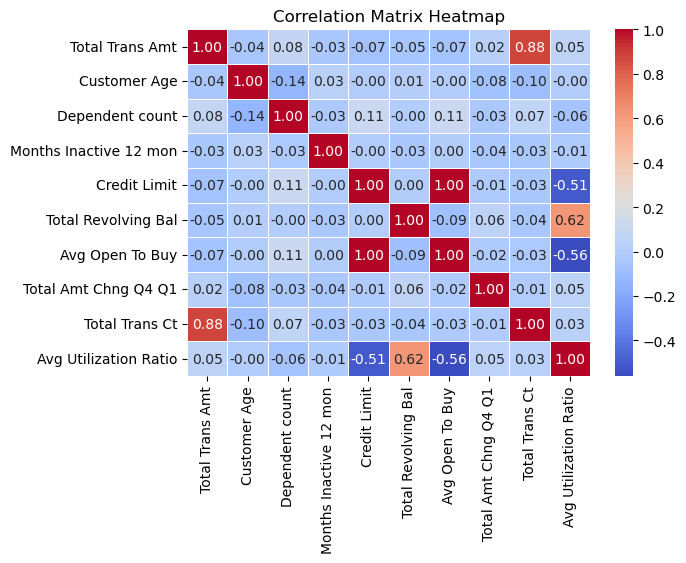

In [93]:
plt.figure(figsize=(6.5, 4.5))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [94]:
from scipy.stats import pointbiserialr

corr_total_trans_amt = pointbiserialr(df['Total Trans Amt'], df['Attrition Flag'])

print(f"Point-biserial correlation for Total Trans Amt: {corr_total_trans_amt.correlation}")
print(f"P-value: {corr_total_trans_amt.pvalue}")


Point-biserial correlation for Total Trans Amt: 0.3040964035003697
P-value: 1.5484212359643543e-128


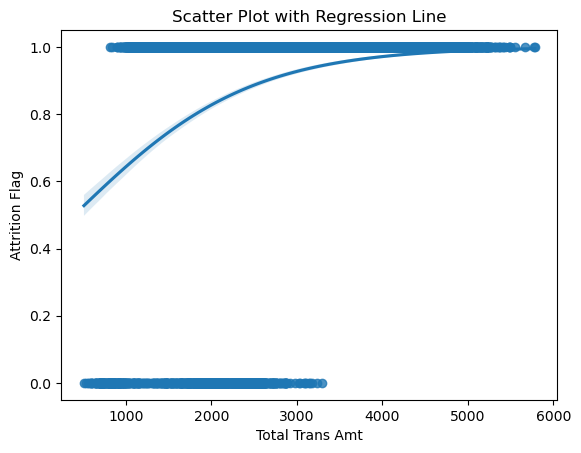

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='Total Trans Amt', y='Attrition Flag', data=df, logistic=True)
plt.xlabel('Total Trans Amt')
plt.ylabel('Attrition Flag')
plt.title('Scatter Plot with Regression Line')
plt.show()


Point-biserial correlation for Months Inactive 12 mon: -0.1350050394782491
P-value: 8.489915144612451e-26


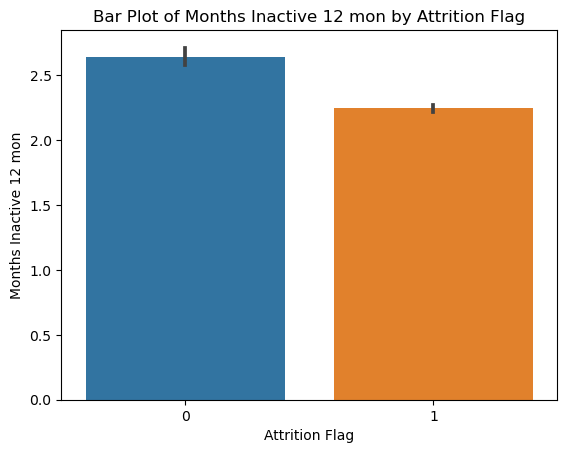

In [96]:
from scipy.stats import pointbiserialr
import seaborn as sns
import matplotlib.pyplot as plt

corr_months_inactive = pointbiserialr(df['Months Inactive 12 mon'], df['Attrition Flag'])
print(f"Point-biserial correlation for Months Inactive 12 mon: {corr_months_inactive.correlation}")
print(f"P-value: {corr_months_inactive.pvalue}")

sns.barplot(x='Attrition Flag', y='Months Inactive 12 mon', data=df)
plt.xlabel('Attrition Flag')
plt.ylabel('Months Inactive 12 mon')
plt.title('Bar Plot of Months Inactive 12 mon by Attrition Flag')
plt.show()



In [97]:
import scipy.stats as stats

existing_customers = df[df['Attrition Flag'] == 'Existing']['Total Trans Amt']
attrited_customers = df[df['Attrition Flag'] == 'Attrited']['Total Trans Amt']

_, p_levene = stats.levene(existing_customers, attrited_customers)
print(f"Levene's Test p-value: {p_levene}")


t_statistic, p_value = stats.ttest_ind(existing_customers, attrited_customers, equal_var=False)

p_value_one_tailed = p_value / 2

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value_one_tailed}")

# Compare p-value with significance level
alpha = 0.05
if p_value_one_tailed < alpha:
    print("Reject the null hypothesis. There is evidence that the mean of 'Total Trans Amt' for attrited customers is greater than the mean for existing customers.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest that the mean of 'Total Trans Amt' for attrited customers is greater than the mean for existing customers.")


Levene's Test p-value: nan
T-Statistic: nan
P-Value: nan
Fail to reject the null hypothesis. There is not enough evidence to suggest that the mean of 'Total Trans Amt' for attrited customers is greater than the mean for existing customers.


C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [98]:
import scipy.stats as stats
import pandas as pd

existing_customers = df[df['Attrition Flag'] == 'Existing']['Months Inactive 12 mon']
attrited_customers = df[df['Attrition Flag'] == 'Attrited']['Months Inactive 12 mon']

selected_columns = ['Months Inactive 12 mon', 'Attrition Flag']
df_selected = df[selected_columns]

print("Rows with missing values:")
print(df_selected[df_selected.isnull().any(axis=1)])

mean_months_inactive_existing = existing_customers.mean()
std_months_inactive_existing = existing_customers.std()

mean_months_inactive_attrited = attrited_customers.mean()
std_months_inactive_attrited = attrited_customers.std()

levene_stat_months_inactive, levene_p_value_months_inactive = stats.levene(
    existing_customers.dropna(),
    attrited_customers.dropna(),
    center='mean'
)

t_stat_months_inactive, t_p_value_months_inactive = stats.ttest_ind(
    existing_customers.dropna(),
    attrited_customers.dropna(),
    equal_var=False  
)

mean_months_inactive_existing, std_months_inactive_existing, mean_months_inactive_attrited, std_months_inactive_attrited, levene_stat_months_inactive, levene_p_value_months_inactive, t_stat_months_inactive, t_p_value_months_inactive



Rows with missing values:
Empty DataFrame
Columns: [Months Inactive 12 mon, Attrition Flag]
Index: []


C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(nan, nan, nan, nan, nan, nan, nan, nan)

### Phase 2 

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [56]:
X = df[['Total Trans Amt', 'Months Inactive 12 mon']]
y = df['Attrition Flag']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [172]:
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [150]:
y_pred = rf_classifier.predict(X_test)


In [151]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [152]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.85
Precision: 0.9144486692015209
Recall: 0.9144486692015209
F1-score: 0.9144486692015209


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [155]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  


In [156]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [171]:
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [158]:
y_val_pred = rf_classifier.predict(X_val)


In [163]:
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

print("Validation Set Evaluation:")
print("Accuracy:", val_accuracy)
print("Precision:", val_precision)
print("Recall:", val_recall)
print("F1-score:", val_f1)

Validation Set Evaluation:
Accuracy: 0.8525
Precision: 0.9222011385199241
Recall: 0.9109653233364574
F1-score: 0.9165487977369167


In [164]:
y_test_pred = rf_classifier.predict(X_test)


In [165]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTesting Set Evaluation:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)


Testing Set Evaluation:
Accuracy: 0.8475
Precision: 0.9102927289896129
Recall: 0.9163498098859315
F1-score: 0.9133112269066794


In [166]:
y_train_pred = rf_classifier.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("\nTraining Set Evaluation:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)



Training Set Evaluation:
Accuracy: 0.980266814897165
Precision: 0.9839846252402307
Recall: 0.9932104752667313
F1-score: 0.9885760257441675


#### Calculation for matches and mismatches
 

In [167]:
matches = sum(y_pred == y_test)
mismatches = len(y_test) - matches

match_percentage = (matches / len(y_test)) * 100
mismatch_percentage = (mismatches / len(y_test)) * 100

print("Percentage of matches:", match_percentage)
print("Percentage of mismatches:", mismatch_percentage)



Percentage of matches: 85.0
Percentage of mismatches: 15.0


### External Verification

In [170]:
X_train_sample = X_train[:100]
y_train_sample = y_train[:100]

predictions = rf_classifier.predict(X_train_sample)

mismatches = sum(predictions != y_train_sample)

mismatch_percentage = (mismatches / 100) * 100

correct_classification_percentage = 100 - mismatch_percentage

print("Percentage of mismatches:", mismatch_percentage)
print("Percent correct classification:", correct_classification_percentage)



Percentage of mismatches: 1.0
Percent correct classification: 99.0
